# Experiment plotting

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import pickle
from lib.measures import *
from lib.data import collect_data_from_df
from lib.calibrationSettings import calibration_lockdown_dates, calibration_start_dates, calibration_mob_paths
from lib.calibrationFunctions import get_calibrated_params, downsample_cases
from lib.experiment import Experiment, Plot, Result, get_properties, load_summary_list
from lib.plot import Plotter

In [3]:
places = [('GER', 'TU'), ('GER', 'RH'), ('GER', 'KL'), ('CH', 'TI'), ('CH', 'BE'), ('CH', 'JU')]

ymax_counterfactual = {'CH' : {'TI': 5000, 'BE': 40000, 'JU': 25000},
        'GER': {'TU': 20000, 'KL': 2000, 'RH': 3500}}

ymax_modelfit = {'GER': {'TU': 1200, 'KL': 800, 'RH': 1000, 'TR': 2000,},
                 'CH': {'VD': 2000, 'BE': 600, 'TI': 500, 'JU': 500,}}

# Model Limitations: Tirschenreuth

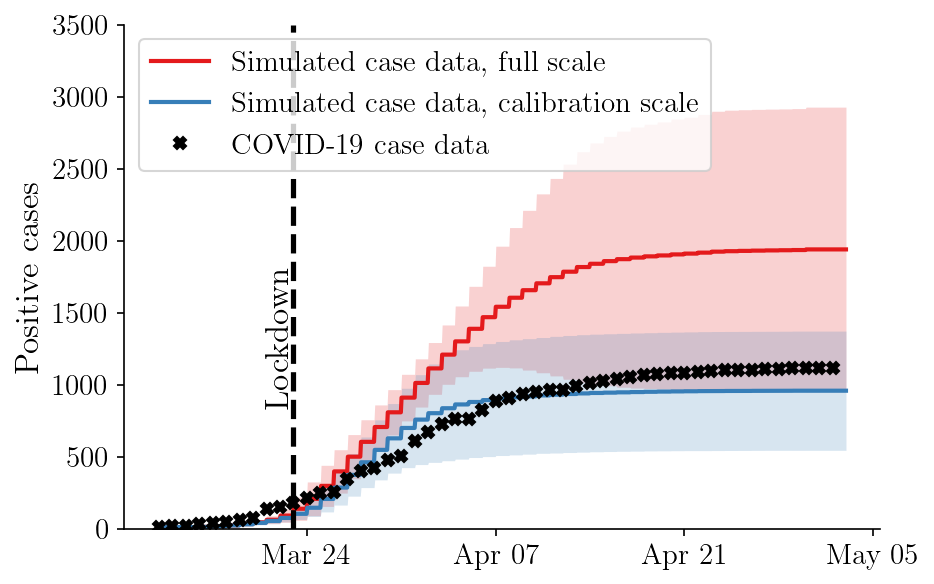

In [4]:
country = 'GER'
area = 'TR'
ymax = 3500

# Format: {`filename for plot` : `list of `Plot` objects`}
plots = {
    f'model-limitations-{area}' : [
        Plot(label='Simulated case data, full scale', 
            path=(f'model_limitations/'
                  f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100.pk')),
        Plot(label='Simulated case data, calibration scale', 
            path=(f'model_limitations/'
                  f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100-downscaled=True.pk')),
    ],
}

for plot_filename, plots in plots.items():

    # extract plot info
    labels = get_properties(plots, 'label')
    paths = get_properties(plots, 'path')

    # load simulations
    results = load_summary_list(paths)
    sims = get_properties(results, 'metadata')
    summaries = get_properties(results, 'summary')

    # plots
    plotter = Plotter()

    start_date = calibration_start_dates[sims[0].country][sims[0].area]
    start_date_lockdown = calibration_lockdown_dates[sims[0].country]['start']
    end_date = calibration_lockdown_dates[sims[0].country]['end']

    days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days        

    mob_settings_paths = calibration_mob_paths[sims[0].country][sims[0].area][1]
    with open(mob_settings_paths, 'rb') as fp:
        mob_settings = pickle.load(fp)

    area_cases = collect_data_from_df(country=country,
         area=area,
         datatype='new',
         start_date_string=start_date,
         end_date_string=end_date)

    sim_cases = downsample_cases(area_cases, mob_settings)      # only downscaling due LK data for cities

    plotter.plot_positives_vs_target(
        summaries, labels,
        sim_cases.sum(axis=1),
        title='Calibration period',
        filename=plot_filename,
        figsize=(6, 4),
        start_date=start_date,
        errorevery=1, acc=1000,
        ymax=ymax,
        lockdown_at=days_until_lockdown,
        lockdown_label_y=ymax/4
    )



# Multibeta: Site specific infectiousness parameters

In [5]:
def plot_multibeta_modelfit(country, area, ymax):
    # Format: {`filename for plot` : `list of `Plot` objects`}
    plots = {
        f'multibeta-modelfit-{country}-{area}' : [
            Plot(label='Simulated COVID-19 case data', 
                path=(f'multibeta/continued-lockdown-{country}-{area}/'
                      f'continued-lockdown-{country}-{area}-extended_lockdown_weeks=100-multi_beta_calibration=True.pk')),
            ],
    }

    for plot_filename, plots in plots.items():

        # extract plot info
        labels = get_properties(plots, 'label')
        paths = get_properties(plots, 'path')

        # load simulations
        results = load_summary_list(paths)
        sims = get_properties(results, 'metadata')
        summaries = get_properties(results, 'summary')

        # plots
        plotter = Plotter()

        start_date = calibration_start_dates[sims[0].country][sims[0].area]
        start_date_lockdown = calibration_lockdown_dates[sims[0].country]['start']
        end_date = calibration_lockdown_dates[sims[0].country]['end']

        days_until_lockdown = (pd.to_datetime(start_date_lockdown) - pd.to_datetime(start_date)).days        

        mob_settings_paths = calibration_mob_paths[sims[0].country][sims[0].area][1]
        with open(mob_settings_paths, 'rb') as fp:
            mob_settings = pickle.load(fp)

        area_cases = collect_data_from_df(country=country,
             area=area,
             datatype='new',
             start_date_string=start_date,
             end_date_string=end_date)

        sim_cases = downsample_cases(area_cases, mob_settings)      # only downscaling due LK data for cities

        plotter.plot_positives_vs_target(
            summaries, labels,
            sim_cases.sum(axis=1),
            title='Calibration period',
            filename=plot_filename,
            figsize=(6, 4),
            start_date=start_date,
            errorevery=1, acc=1000,
            ymax=ymax[sims[0].country][sims[0].area],
            lockdown_at=days_until_lockdown,
            lockdown_label_y=ymax[sims[0].country][sims[0].area]/4
        )
        
        plotter.plot_age_group_positives_vs_target(
            summaries[0], 
            sim_cases,
            filename=plot_filename+'-per-age-group',
            figsize=(16, 2.5),
            start_date=start_date,
            errorevery=1, acc=1000,
            ymax=int(ymax[country][area] / 4)
        )


GER TU
GER RH
GER KL
CH TI
CH BE
CH JU


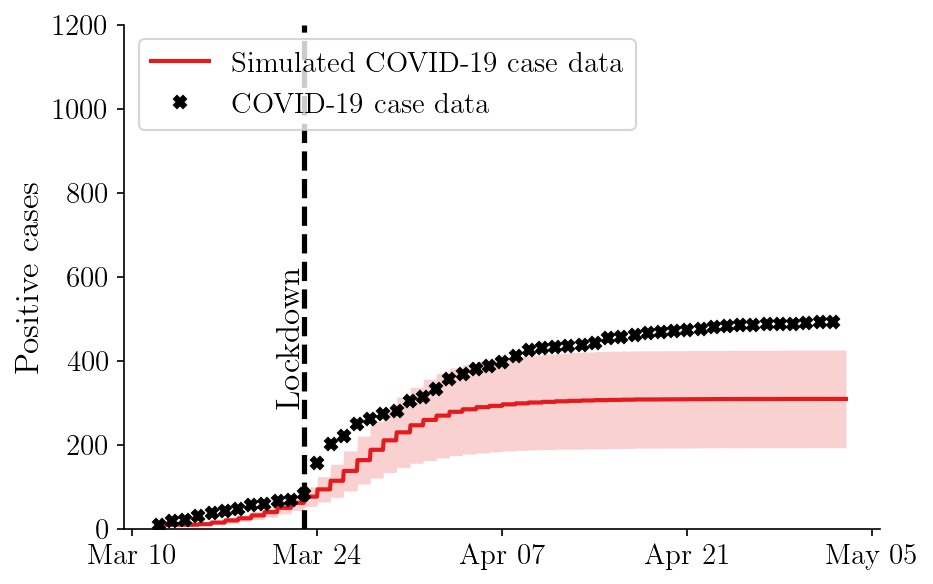

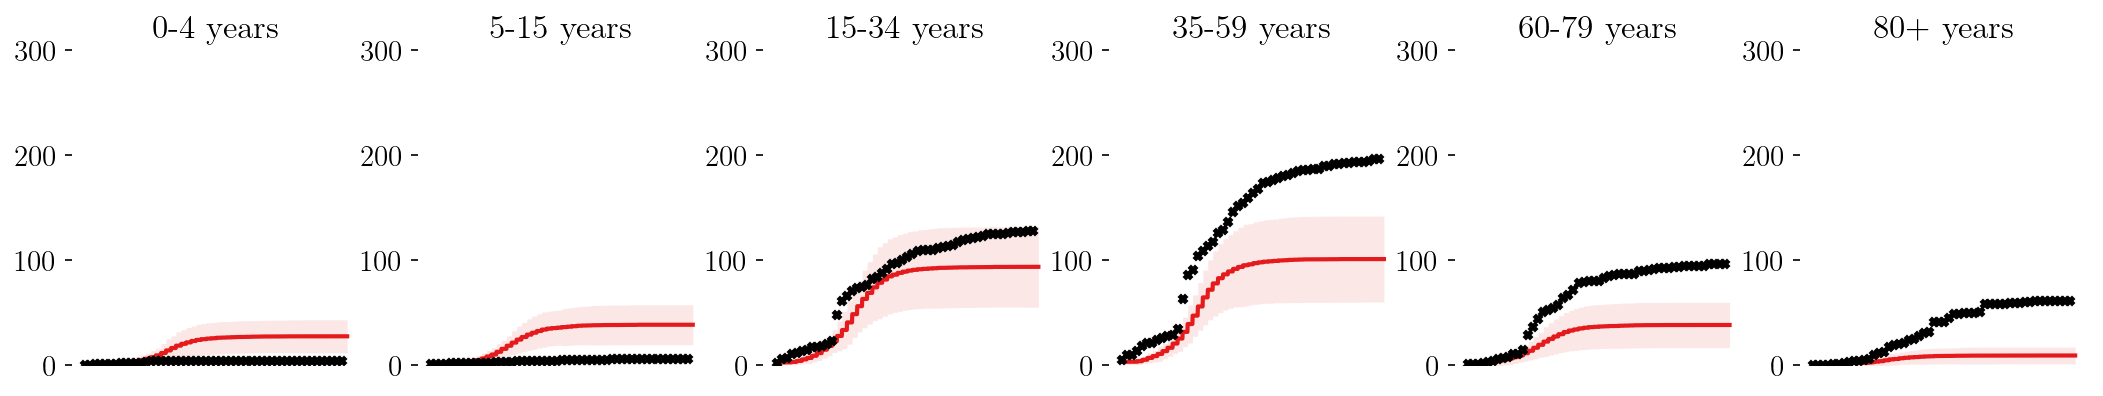

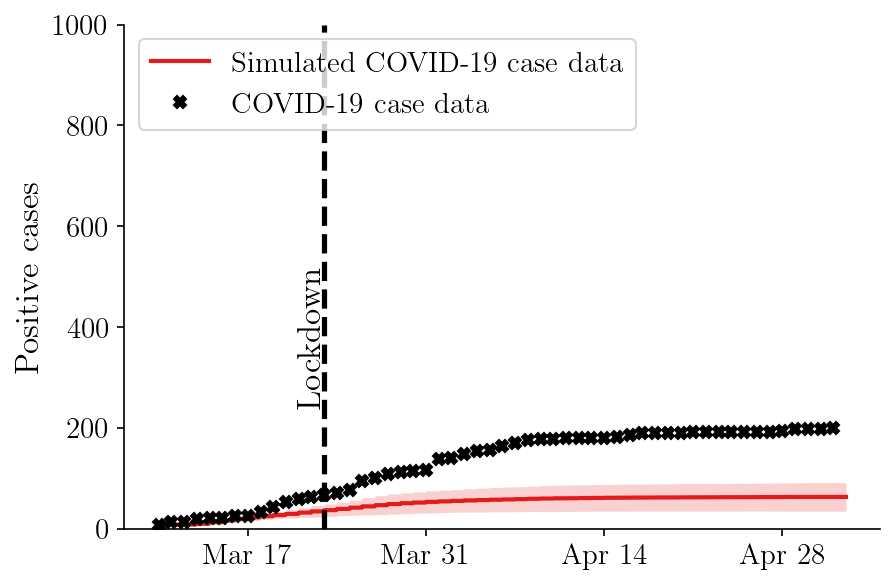

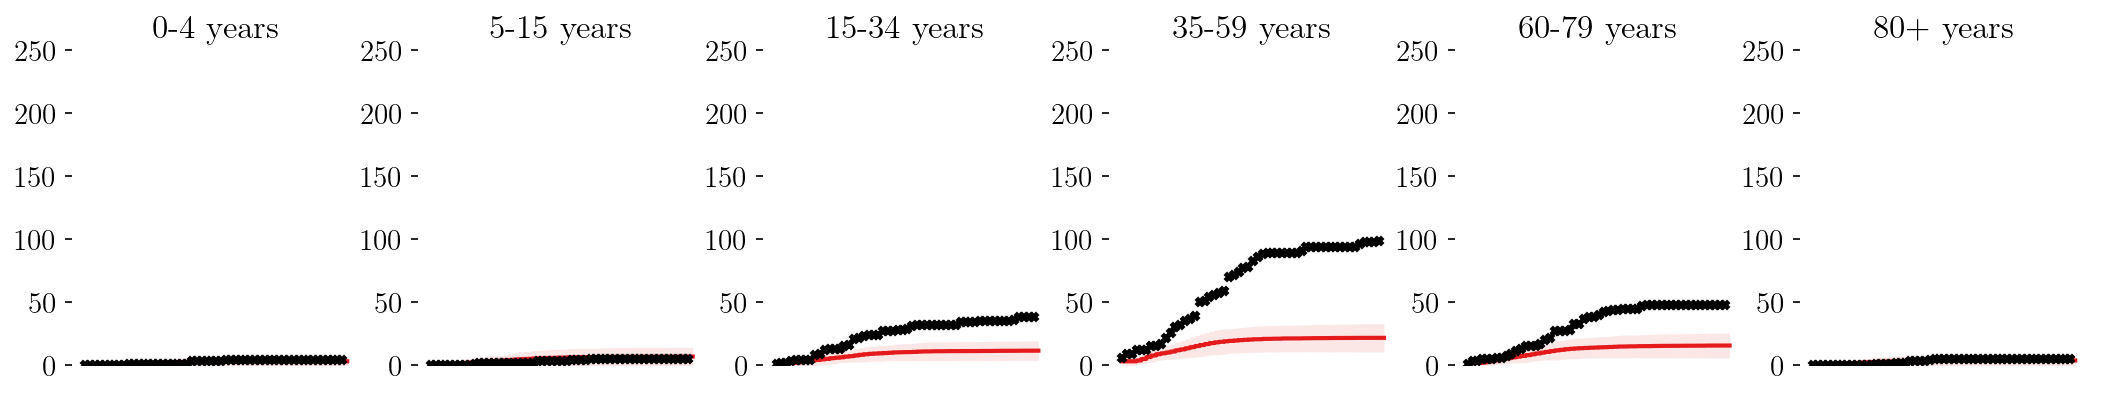

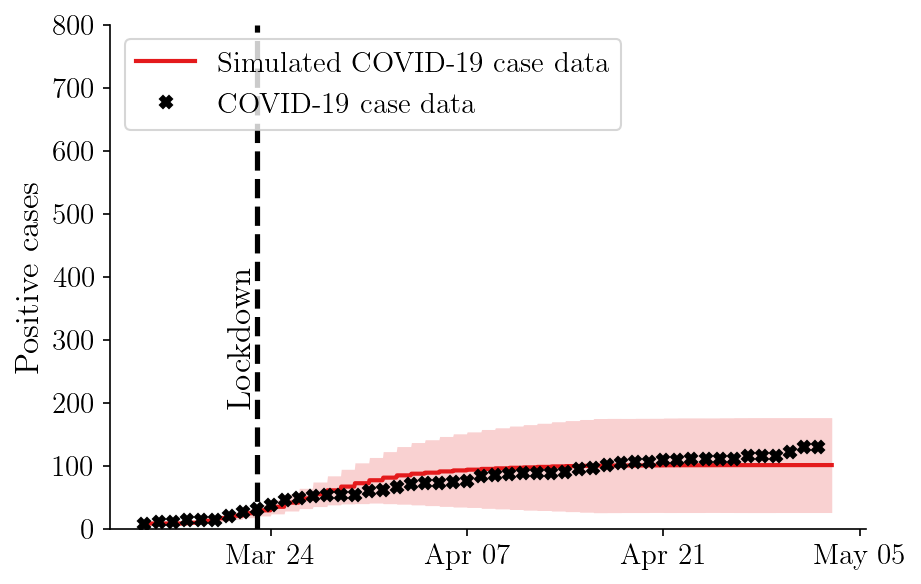

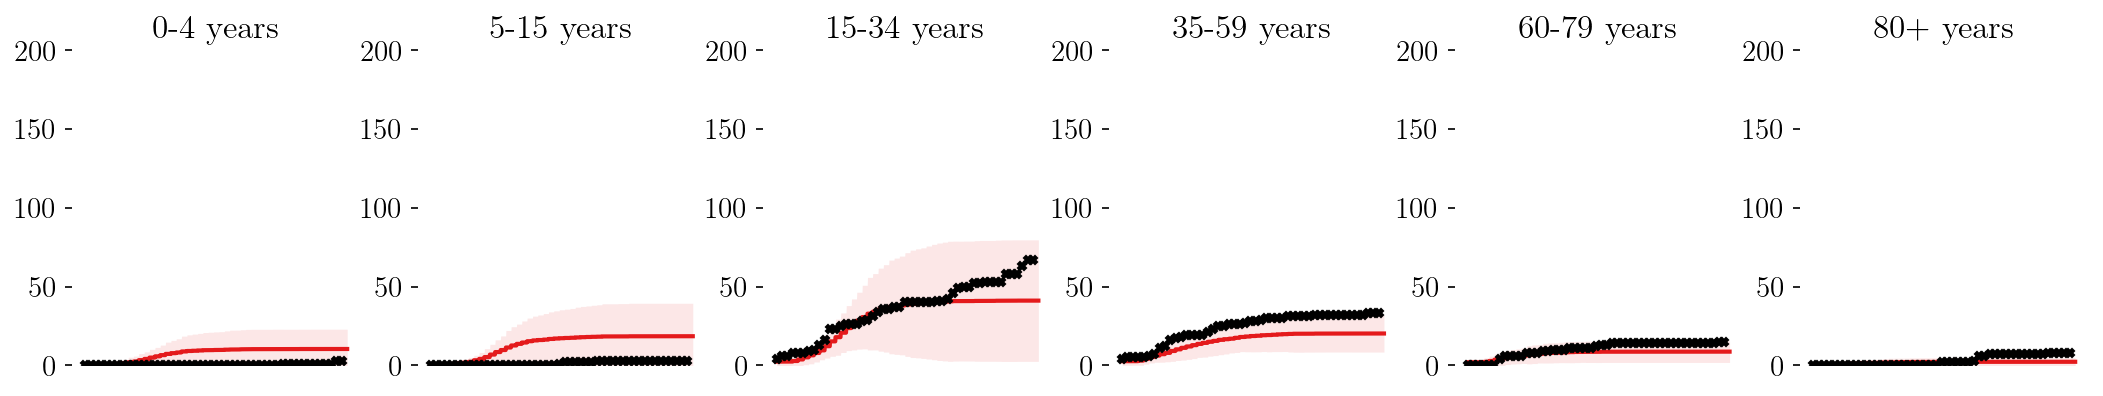

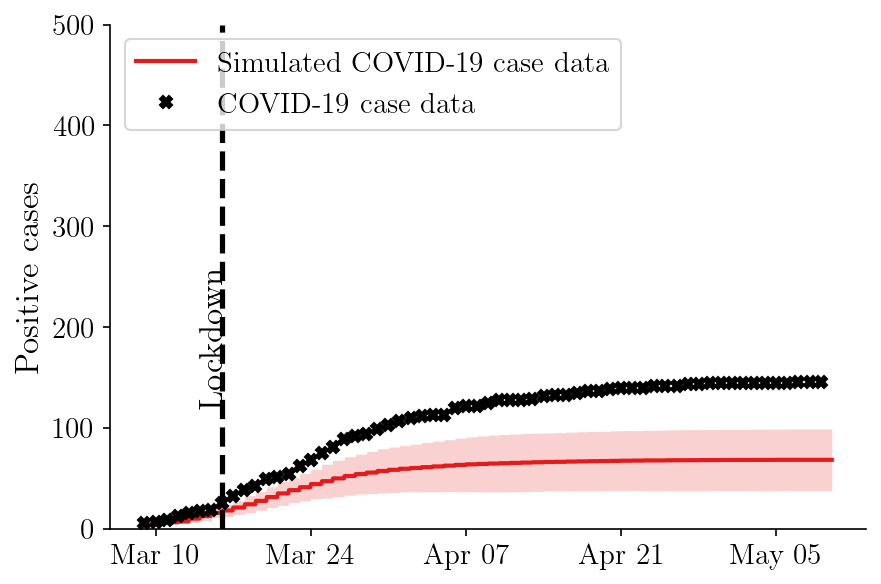

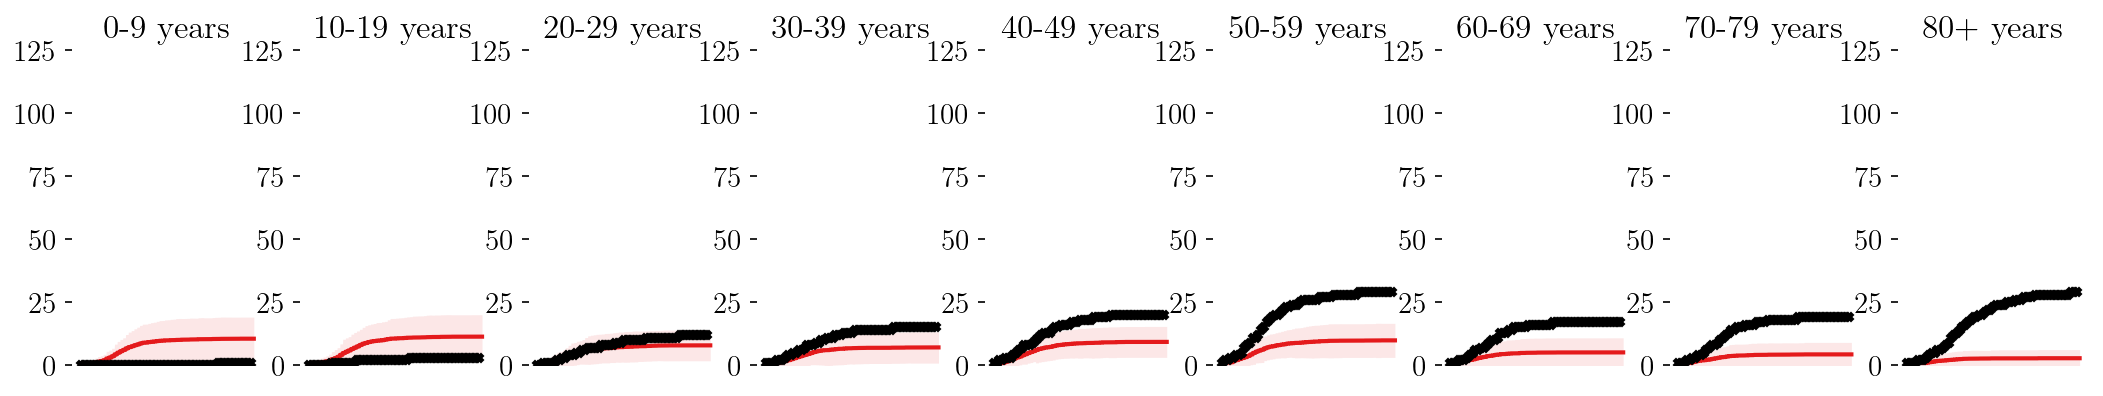

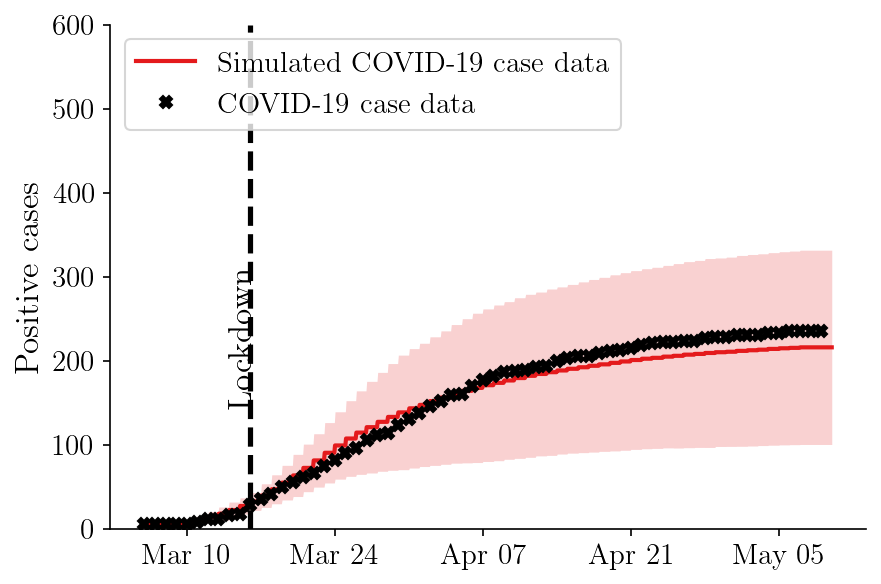

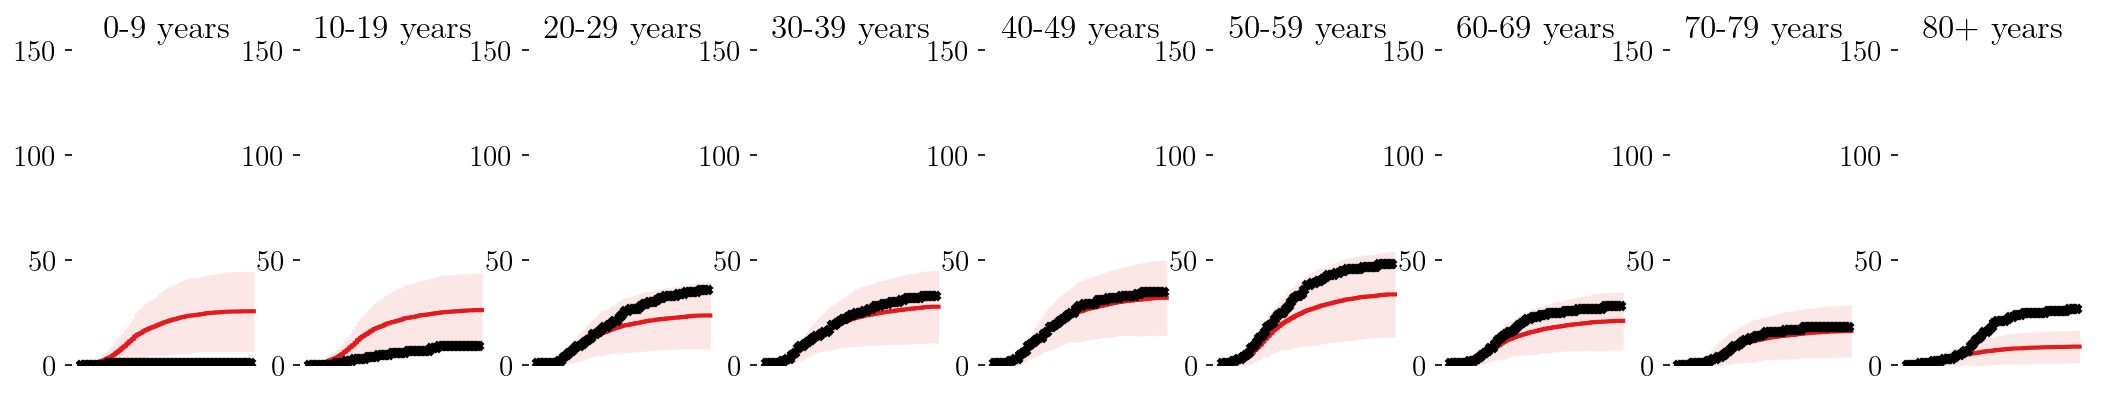

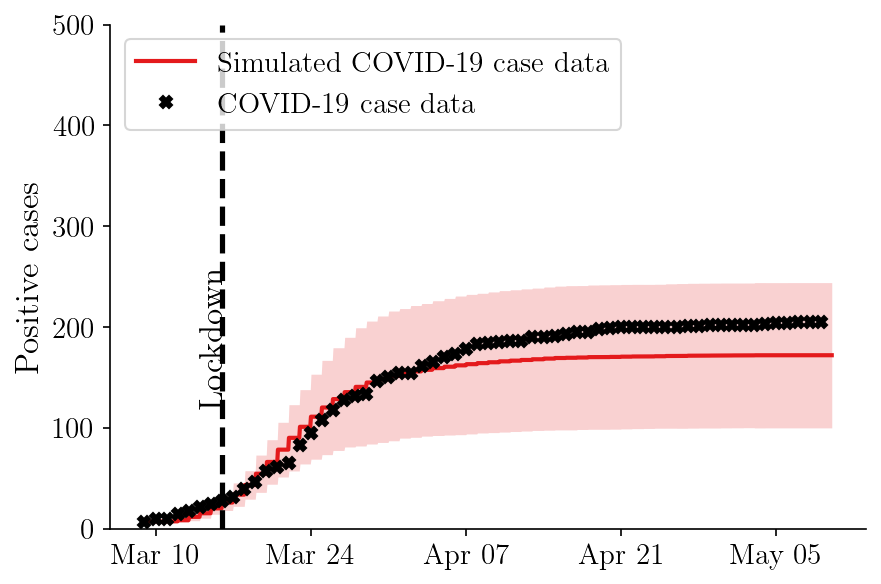

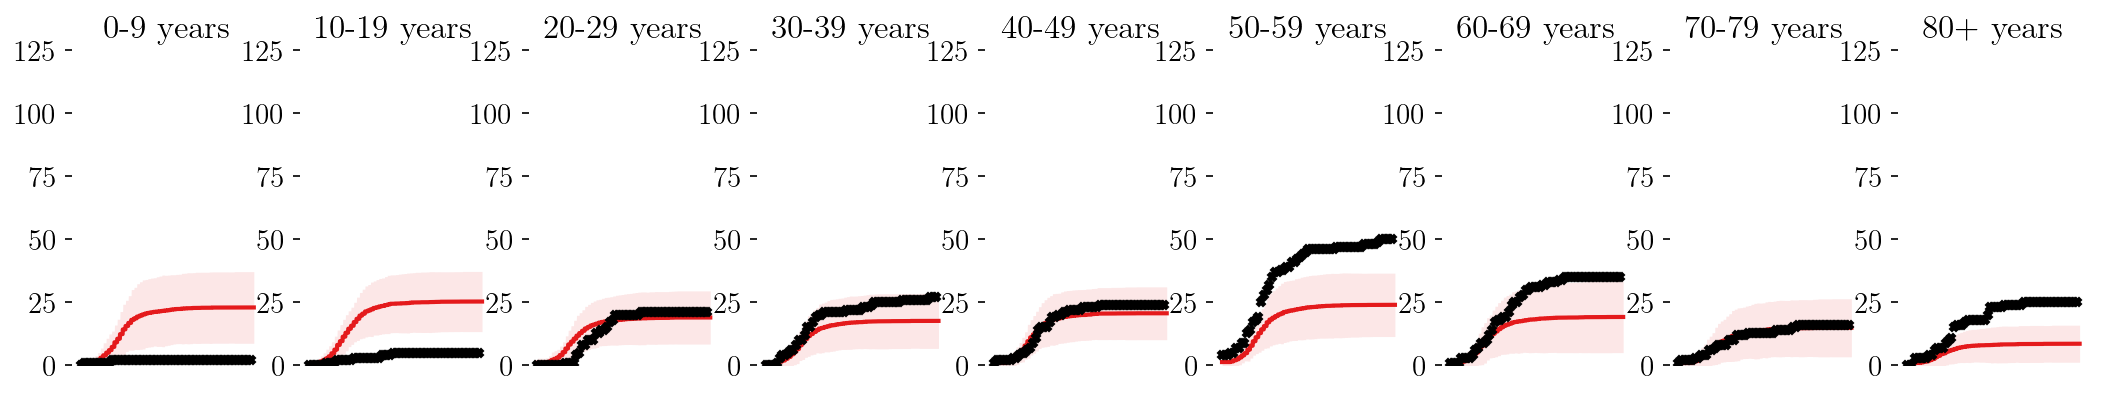

In [6]:
ymax_modelfit = {'GER': {'TU': 1200, 'KL': 800, 'RH': 1000, 'TR': 2000,},
                 'CH': {'VD': 2000, 'BE': 600, 'TI': 500, 'JU': 500,}}

for country, area in places:
    print(country, area)
    plot_multibeta_modelfit(country, area, ymax_modelfit)